### Car price predictor for used Mercedes Benz

Load the original dataset: our csv file is located inside of 'data' directory, so following directory path can safely bring it into the current analysis file.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

df = pd.read_csv("../data/merc.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


### Explore the detail of the dataset:
- the shape of dataset
- the statistics of each numerical feature (type of each columns and the amount of non-null datapoints)
- the amount of each of unqiue value from each categorical feature
- the amount of NaN values

In [21]:
print(f"Shape of the dataset: {df.shape}")
print(f"----------------------------------------------------------------------------")

print(f"Each column's data type and the amount of non-null datapoints of the dataset:")
print(df.info())
print(f"----------------------------------------------------------------------------")

print("Each of numerical feature's statistics")
print(df.describe())
print(f"----------------------------------------------------------------------------")

print(f"Each of categorical feature's unqiue values")
categorical_feature = ["model", "transmission", "fuelType"]
for feature in categorical_feature:
    print(f"{df[feature].value_counts()}")
    if feature != "fuelType":
        print(f"--------------------------------")
print(f"----------------------------------------------------------------------------")

print(f"The amount of NaN values from each column")
print(df.isnull().sum())

Shape of the dataset: (13119, 9)
----------------------------------------------------------------------------
Each column's data type and the amount of non-null datapoints of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB
None
----------------------------------------------------------------------------
Each of numerical feature's statistics
               year          price        mile

### Rename certain features' name.

- `fuelType`: rename to `fuel_type`
- `engineSize`: rename to `engine_size`

In [22]:
df = df.rename(columns={"fuelType": "fuel_type", "engineSize": "engine_size"})
for column in df.columns:
    print(column)

model
year
price
transmission
mileage
fuel_type
tax
mpg
engine_size


### Remove the meaningless space in front of the `model` feature's values.

There is a small space character in front of every `model` feature's value. Removing this can maintain a clean dataset.

In [23]:
model_slk_string = df['model'].unique()[0]
print(f"model 'SLK' in string: {model_slk_string}")
print(f"string length: {len(model_slk_string)}")

df['model'] = df['model'].str.strip()

model_slk_new_string = df['model'].unique()[0]
print(f"model 'SLK' in new string: {model_slk_new_string}")
print(f"new string length: {len(model_slk_new_string)}")

model 'SLK' in string:  SLK
string length: 4
model 'SLK' in new string: SLK
new string length: 3


### The original dataset contains rare categorical values from each feature. Dropping rows that contain these rare values can help improve model accuracy, as these examples contribute little to the overall statistical patterns and may introduce noise. Since these rare categories represent the minority part of the data, removing them will not significantly harm the model's performance. Therefore, exclude rows containing any of the following conditions:

- `model`: "CLK", "CLC Class", "R Class", "180", "230", "220", "200"
- `transmission`: "Other"
- `fuelType`: "Other"

In [24]:
previous_length = len(df)

double_other = df[
    (df["transmission"] == "Other") &
    (df["fuel_type"] == "Other")
]

df = df[~
   (
    (df["model"].isin(["CLK", "CLC Class", "R Class", "180", "230", "220", "200"])) |
    (df["transmission"] == "Other") |
    (df["fuel_type"] == "Other")
    )
]

new_length = len(df)

print(f"Length of original dataset: {previous_length}")
print(f"Length of current dataset: {new_length}")
print(f"Number of rows that were dropped: {previous_length - new_length}")

Length of original dataset: 13119
Length of current dataset: 13095
Number of rows that were dropped: 24


### Note that 24 examples got eliminated from the original dataset (if manually count the number of examples that satisfies conditions, 25 examples should've been dropped).

There was a single example that had value "Other" for both `transmission` and `fuelType`. This was stored on `double_other` from the previous cell before dropping.

In [25]:
double_other

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0


### Visualize each of categorical feature
Use a bar plot to visualize the number of each categorical feature. The `model` feature uses a horizontal bar plot to clearly show the name of each feature's unqiue name.

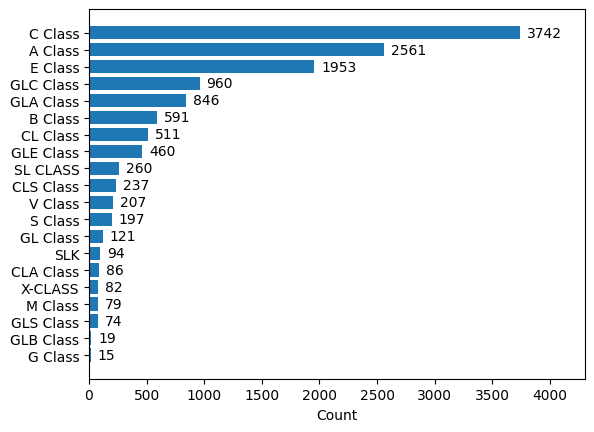

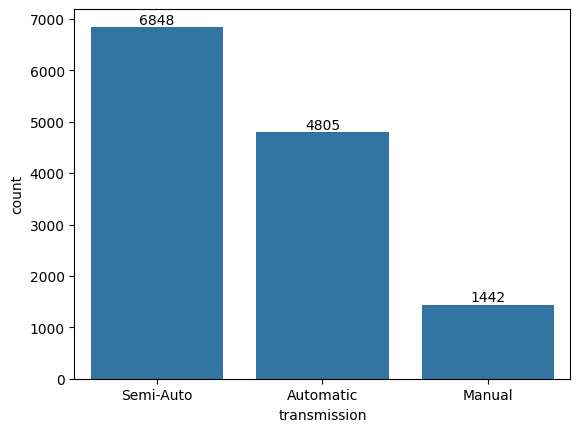

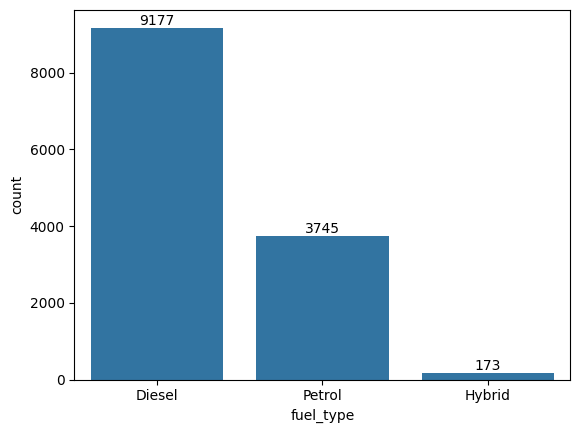

In [26]:
categorical_features = df[["model", "transmission", "fuel_type"]]

for categorical in categorical_features.columns:

    if categorical == "model":

        counts = df[categorical].value_counts()

        model = counts.index
        y_pos = np.arange(len(counts.index))
        performance = counts.values

        fig, ax = plt.subplots()

        hbars = ax.barh(y_pos, performance, align='center')
        ax.set_yticks(y_pos, labels=model)
        ax.invert_yaxis()
        ax.set_xlabel('Count')

        ax.bar_label(hbars, padding=5)
        ax.set_xlim(0, max(counts.values) * 1.15)

        plt.show()
        

    else:

        order = df[categorical].value_counts().index
        ax = sns.countplot(x=categorical, data=df, order=order)

        for container in ax.containers:
            ax.bar_label(container)
        
    plt.show()

### Visualize each of numerical feature
Use violin plot to visualize numerical features.

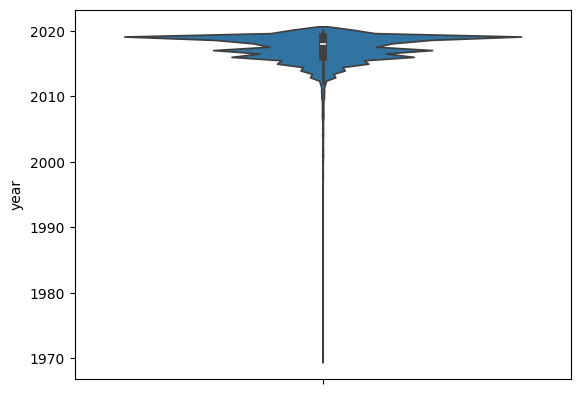

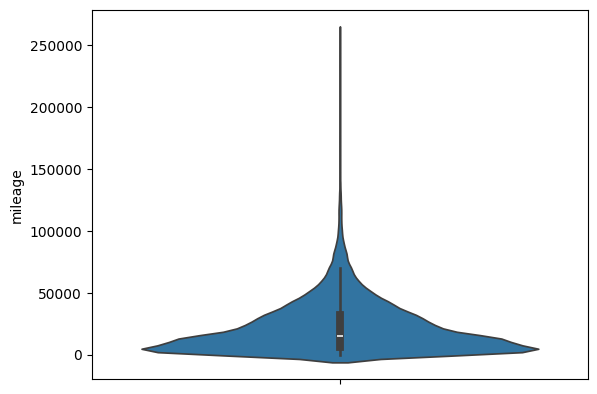

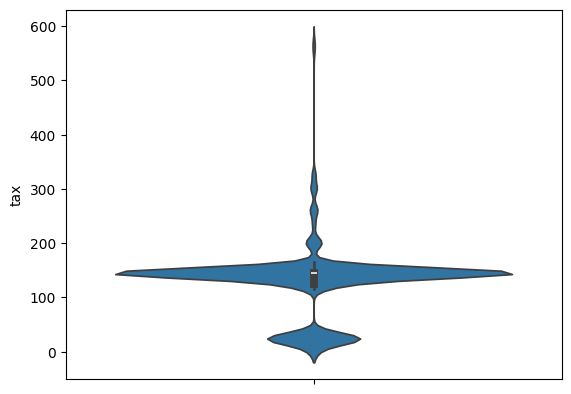

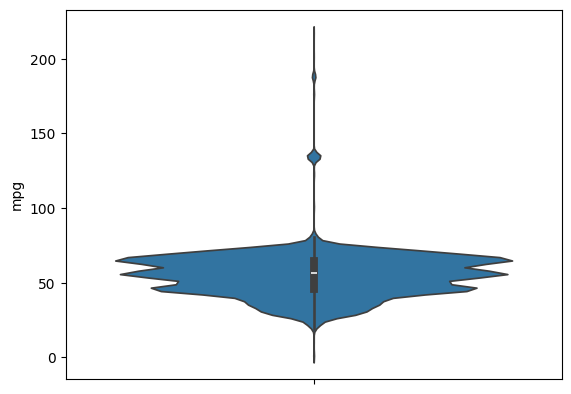

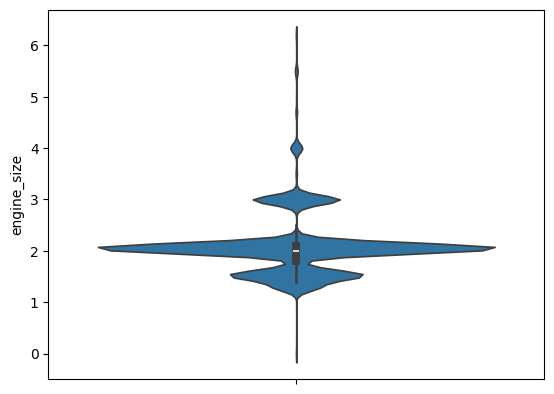

In [27]:
numerical_features = df[["year", "mileage", "tax", "mpg", "engine_size"]]

for numerical in numerical_features.columns:

    sns.violinplot(y=numerical, data=df)
    plt.show()

### Visualize the target

Since it's also a numerical variable, we use violinplot.

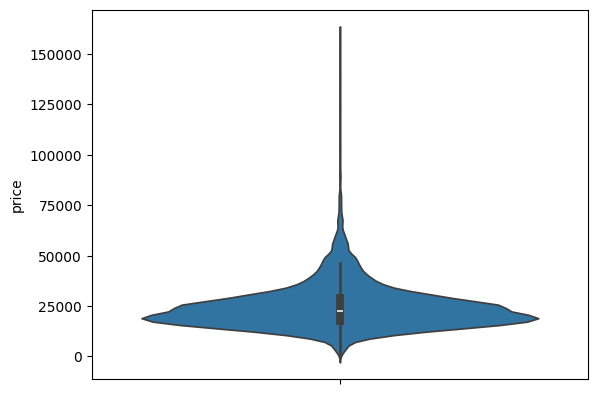

In [28]:
sns.violinplot(y="price", data=df)
plt.show()

### Visualize the relationship of each feature and the target with using a scatterplot.

Switch the x and y only when visualizing `model` feature and the target (long `model` names).

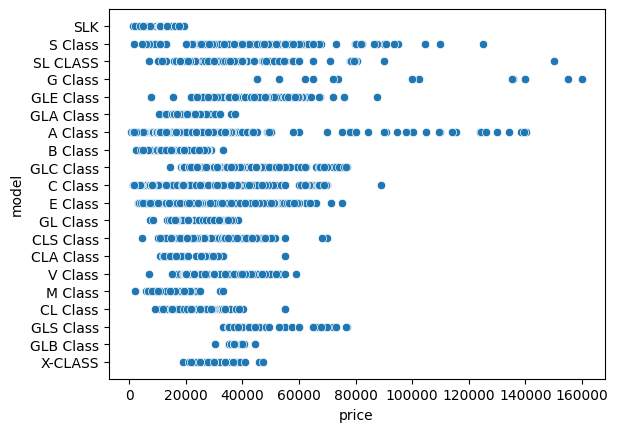

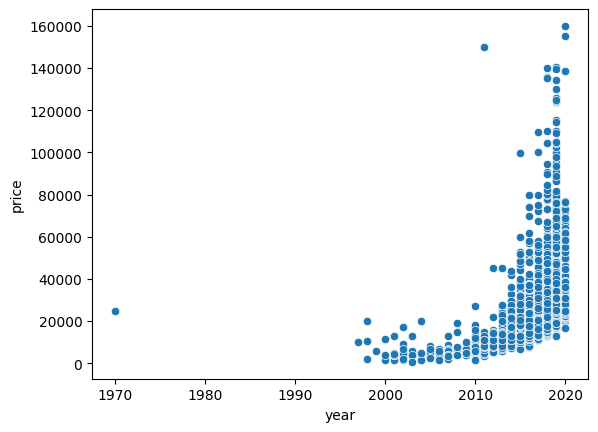

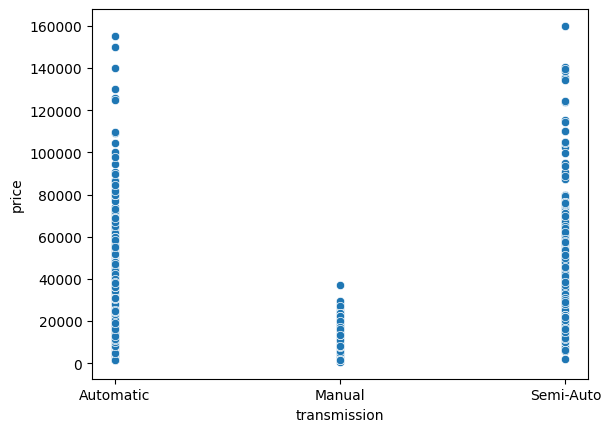

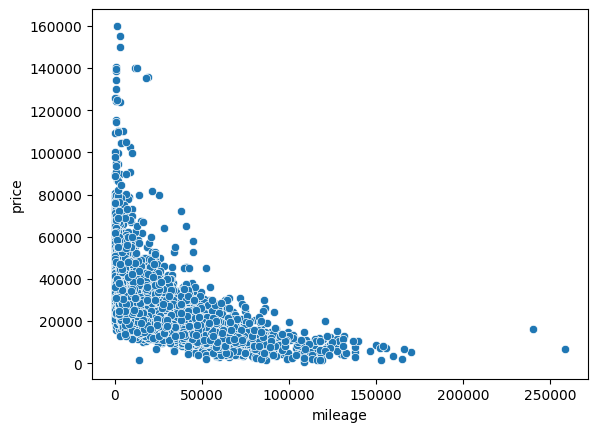

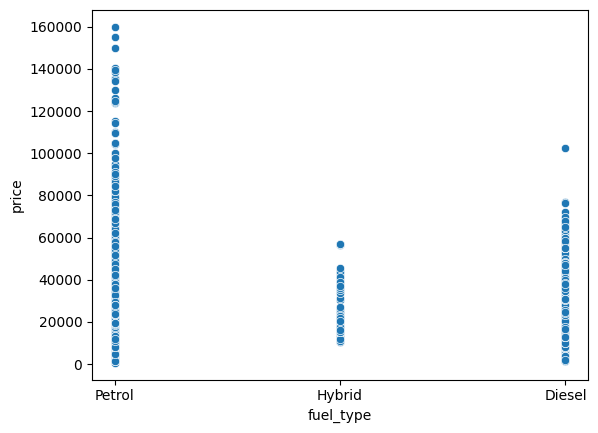

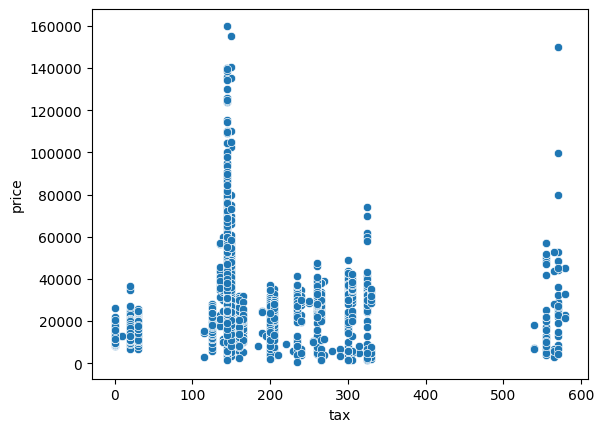

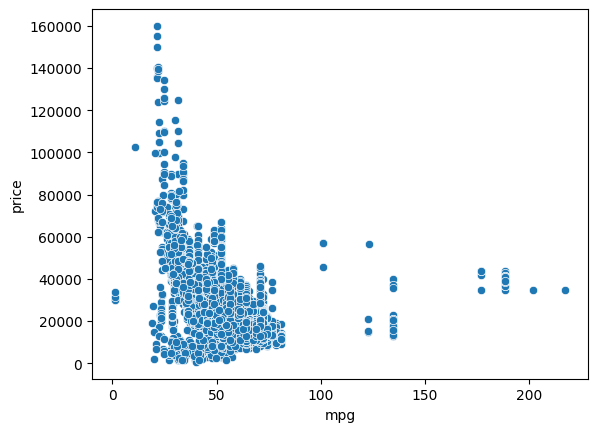

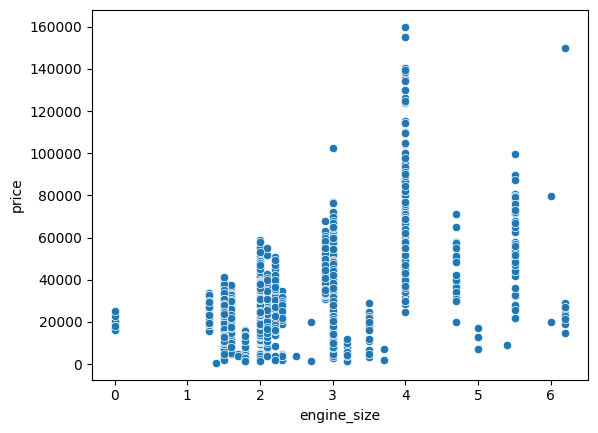

In [29]:
every_feature = df.drop(columns="price")
target = df["price"]

for feature in every_feature.columns:

    if feature == 'model':
        sns.scatterplot(x=target.name, y=feature, data=df)
    else:
        sns.scatterplot(x=feature, y=target.name, data=df)
    plt.show()

### Vertical lines has been observed from previous scatterplots:

The majority of features have a non-linear relationship with the target.

At this moment, try DecisionTreeRegressor, Random Forest Algorithm, and XGBoost to create predictions.

### Split the dataset into train and cross-validation sets and one-hot encode the categorical features.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(every_feature, target, train_size=0.8, random_state=RANDOM_STATE)


encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


categorical_variables = ["model", "transmission", "fuel_type"]

X_train_encoded = encoder.fit_transform(X_train[categorical_variables])
X_val_encoded = encoder.transform(X_val[categorical_variables])


### Test various minimum sample splits and maximum depth

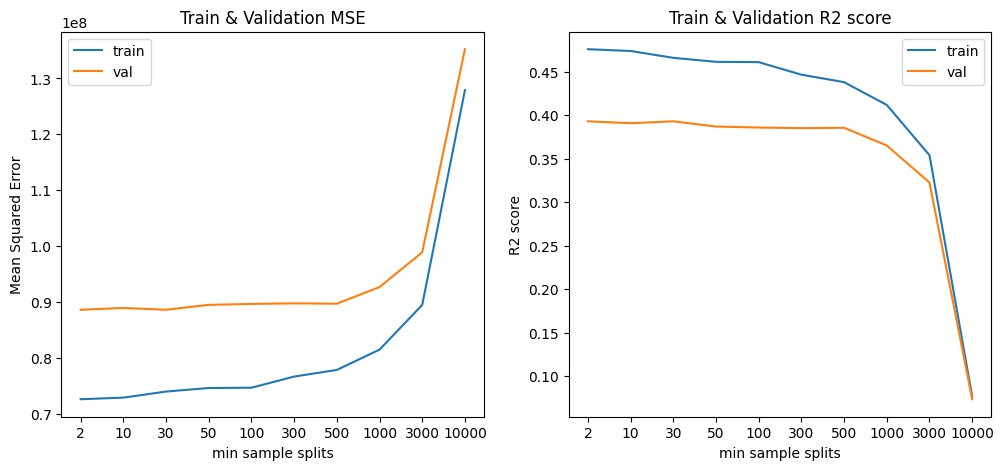

In [31]:
test_min_samples_splits = [2, 10, 30, 50, 100, 300, 500, 1000, 3000, 10000]


mse_train_min_samples_splits = []
mse_val_min_samples_splits = []

r2_train_min_samples_splits = []
r2_val_min_samples_splits = []


for min_sample_split in test_min_samples_splits:
    model = DecisionTreeRegressor(min_samples_split=min_sample_split, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)
    pred_train = model.predict(X_train_encoded)
    pred_val = model.predict(X_val_encoded)

    single_mse_train = mean_squared_error(y_train, pred_train)
    single_mse_val = mean_squared_error(y_val, pred_val)

    single_r2score_train = r2_score(y_train, pred_train)
    single_r2score_val = r2_score(y_val, pred_val)


    mse_train_min_samples_splits.append(single_mse_train)
    mse_val_min_samples_splits.append(single_mse_val)

    r2_train_min_samples_splits.append(single_r2score_train)
    r2_val_min_samples_splits.append(single_r2score_val)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Train & Validation MSE")
ax1.set_xlabel("min sample splits")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(ticks=range(len(test_min_samples_splits)))
ax1.set_xticklabels(test_min_samples_splits)

ax1.plot(range(len(mse_train_min_samples_splits)), mse_train_min_samples_splits, label='train')
ax1.plot(range(len(mse_val_min_samples_splits)), mse_val_min_samples_splits, label='val')

ax1.legend()



ax2.set_title("Train & Validation R2 score")
ax2.set_xlabel("min sample splits")
ax2.set_ylabel("R2 score")
ax2.set_xticks(ticks=range(len(test_min_samples_splits)))
ax2.set_xticklabels(test_min_samples_splits)

ax2.plot(range(len(r2_train_min_samples_splits)), r2_train_min_samples_splits, label='train')
ax2.plot(range(len(r2_val_min_samples_splits)), r2_val_min_samples_splits, label='val')

ax2.legend()


### Test various maximum depths

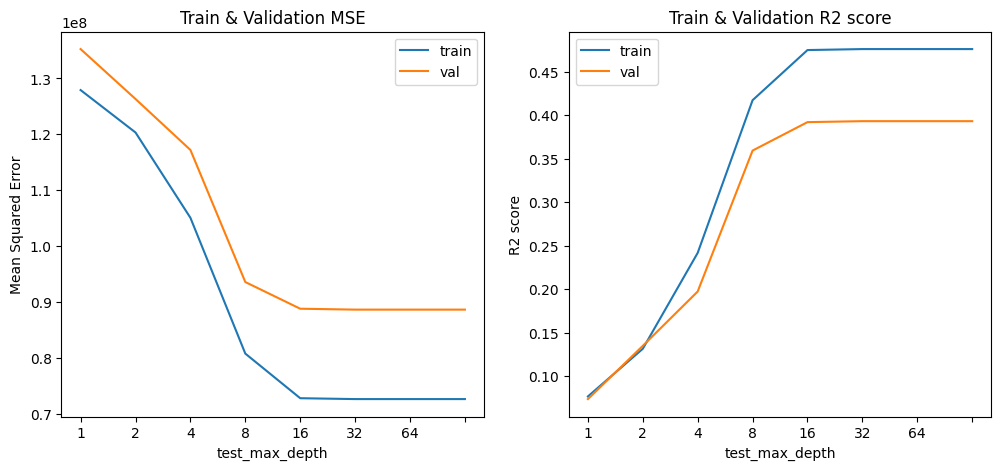

In [32]:
test_max_depth = [1, 2, 4, 8, 16, 32, 64, None]

mse_train_n_estimators = []
mse_val_n_estimators = []

r2_train_n_estimators = []
r2_val_n_estimators = []


for max_depth in test_max_depth:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)
    pred_train = model.predict(X_train_encoded)
    pred_val = model.predict(X_val_encoded)

    single_mse_train = mean_squared_error(y_train, pred_train)
    single_mse_val = mean_squared_error(y_val, pred_val)

    single_r2score_train = r2_score(y_train, pred_train)
    single_r2score_val = r2_score(y_val, pred_val)


    mse_train_n_estimators.append(single_mse_train)
    mse_val_n_estimators.append(single_mse_val)

    r2_train_n_estimators.append(single_r2score_train)
    r2_val_n_estimators.append(single_r2score_val)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Train & Validation MSE")
ax1.set_xlabel("test_max_depth")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(ticks=range(len(test_max_depth)))
ax1.set_xticklabels(test_max_depth)

ax1.plot(range(len(mse_train_n_estimators)), mse_train_n_estimators, label='train')
ax1.plot(range(len(mse_val_n_estimators)), mse_val_n_estimators, label='val')

ax1.legend()



ax2.set_title("Train & Validation R2 score")
ax2.set_xlabel("test_max_depth")
ax2.set_ylabel("R2 score")
ax2.set_xticks(ticks=range(len(test_max_depth)))
ax2.set_xticklabels(test_max_depth)

ax2.plot(range(len(r2_train_n_estimators)), r2_train_n_estimators, label='train')
ax2.plot(range(len(r2_val_n_estimators)), r2_val_n_estimators, label='val')

ax2.legend()

In [49]:
results = []


for msp in test_min_samples_splits:
    for md in test_max_depth:

        model = DecisionTreeRegressor(min_samples_split=msp, max_depth=md, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)

        rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train_encoded)))
        rmse_val = np.sqrt(mean_squared_error(y_val, model.predict(X_val_encoded)))

        r2_train = r2_score(y_train, model.predict(X_train_encoded))
        r2_val = r2_score(y_val, model.predict(X_val_encoded))


        result = (rmse_train, rmse_val, r2_train, r2_val)
        

        results.append(rmse_val)

        # 9121.70486



for result in results:

    if result < np.float64(9200) and result > np.float64(9100):
        print(result)

# decision_tree_model = DecisionTreeRegressor(min_samples_split=3000, max_depth=8, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)

# print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, decision_tree_model.predict(X_train_encoded)))}")
# print(f"RMSE (val): {np.sqrt(mean_squared_error(y_val, decision_tree_model.predict(X_val_encoded)))}")

# print(f"R2 score (train): {r2_score(y_train, decision_tree_model.predict(X_train_encoded))}")
# print(f"R2 score (val): {r2_score(y_val, decision_tree_model.predict(X_val_encoded))}")


### Seems like DecisionTreeRegressor not working well. Now use RandomForestRegressor

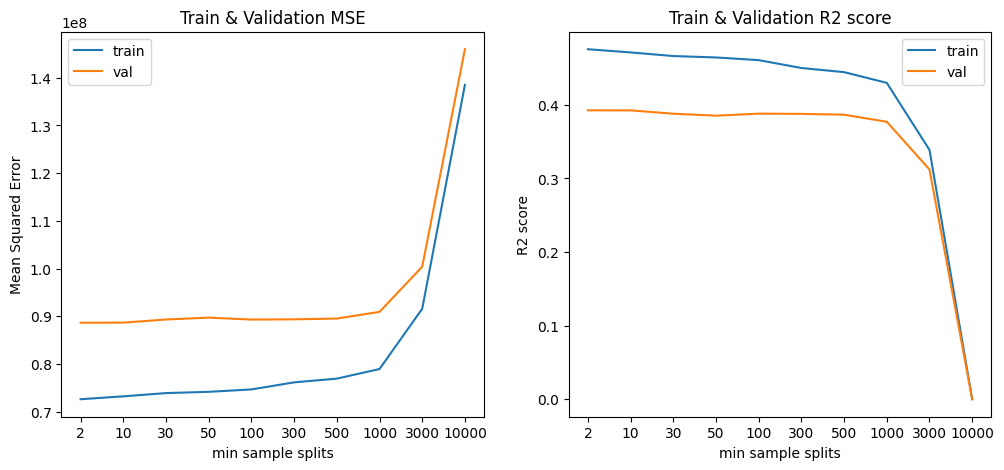

In [34]:
test_min_samples_splits = [2, 10, 30, 50, 100, 300, 500, 1000, 3000, 10000]


mse_train_min_samples_splits = []
mse_val_min_samples_splits = []

r2_train_min_samples_splits = []
r2_val_min_samples_splits = []


for min_sample_split in test_min_samples_splits:
    model = RandomForestRegressor(min_samples_split=min_sample_split, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)
    pred_train = model.predict(X_train_encoded)
    pred_val = model.predict(X_val_encoded)

    single_mse_train = mean_squared_error(y_train, pred_train)
    single_mse_val = mean_squared_error(y_val, pred_val)

    single_r2score_train = r2_score(y_train, pred_train)
    single_r2score_val = r2_score(y_val, pred_val)


    mse_train_min_samples_splits.append(single_mse_train)
    mse_val_min_samples_splits.append(single_mse_val)

    r2_train_min_samples_splits.append(single_r2score_train)
    r2_val_min_samples_splits.append(single_r2score_val)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Train & Validation MSE")
ax1.set_xlabel("min sample splits")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(ticks=range(len(test_min_samples_splits)))
ax1.set_xticklabels(test_min_samples_splits)

ax1.plot(range(len(mse_train_min_samples_splits)), mse_train_min_samples_splits, label='train')
ax1.plot(range(len(mse_val_min_samples_splits)), mse_val_min_samples_splits, label='val')

ax1.legend()



ax2.set_title("Train & Validation R2 score")
ax2.set_xlabel("min sample splits")
ax2.set_ylabel("R2 score")
ax2.set_xticks(ticks=range(len(test_min_samples_splits)))
ax2.set_xticklabels(test_min_samples_splits)

ax2.plot(range(len(r2_train_min_samples_splits)), r2_train_min_samples_splits, label='train')
ax2.plot(range(len(r2_val_min_samples_splits)), r2_val_min_samples_splits, label='val')

ax2.legend()

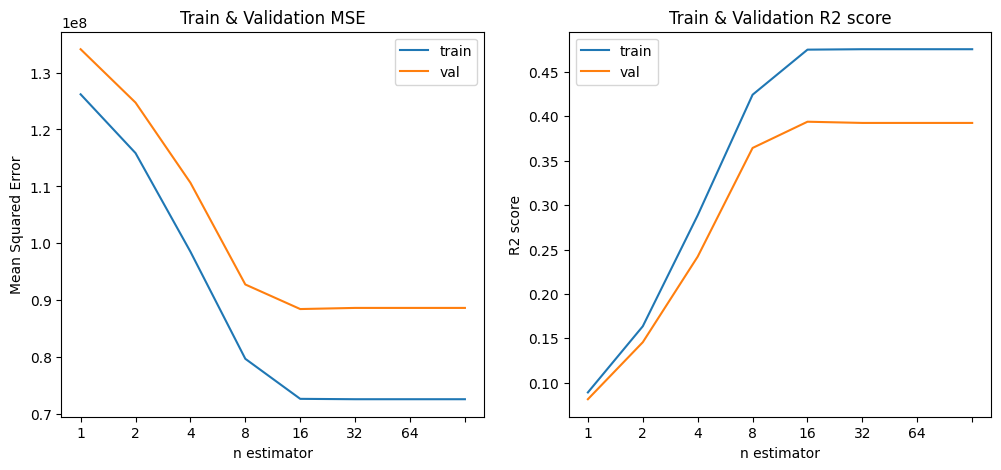

In [35]:
test_max_depth = [1, 2, 4, 8, 16, 32, 64, None]

mse_train_max_depth = []
mse_val_max_depth = []

r2_train_max_depth = []
r2_val_max_depth = []


for max_depth in test_max_depth:
    model = RandomForestRegressor(max_depth=max_depth, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)
    pred_train = model.predict(X_train_encoded)
    pred_val = model.predict(X_val_encoded)

    single_mse_train = mean_squared_error(y_train, pred_train)
    single_mse_val = mean_squared_error(y_val, pred_val)

    single_r2score_train = r2_score(y_train, pred_train)
    single_r2score_val = r2_score(y_val, pred_val)


    mse_train_max_depth.append(single_mse_train)
    mse_val_max_depth.append(single_mse_val)

    r2_train_max_depth.append(single_r2score_train)
    r2_val_max_depth.append(single_r2score_val)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Train & Validation MSE")
ax1.set_xlabel("n estimator")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(ticks=range(len(test_max_depth)))
ax1.set_xticklabels(test_max_depth)

ax1.plot(range(len(mse_train_max_depth)), mse_train_max_depth, label='train')
ax1.plot(range(len(mse_val_max_depth)), mse_val_max_depth, label='val')

ax1.legend()



ax2.set_title("Train & Validation R2 score")
ax2.set_xlabel("n estimator")
ax2.set_ylabel("R2 score")
ax2.set_xticks(ticks=range(len(test_max_depth)))
ax2.set_xticklabels(test_max_depth)

ax2.plot(range(len(r2_train_max_depth)), r2_train_max_depth, label='train')
ax2.plot(range(len(r2_val_max_depth)), r2_val_max_depth, label='val')

ax2.legend()

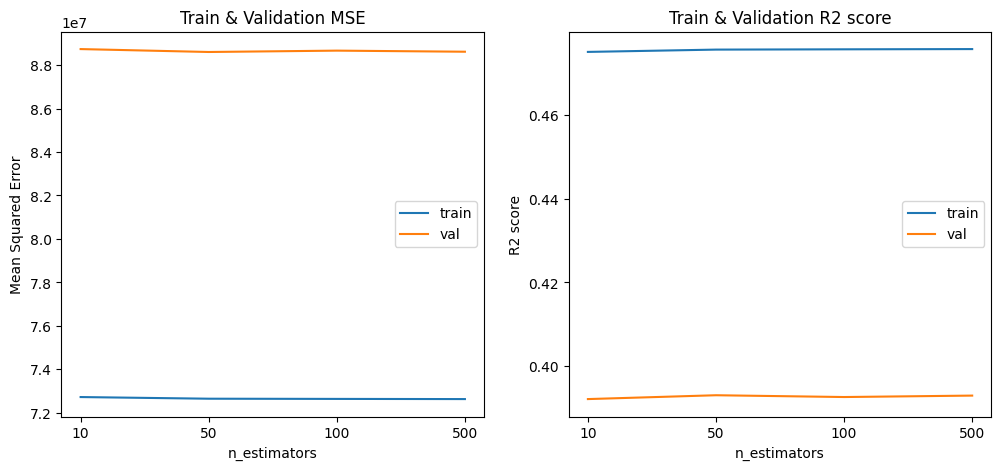

In [36]:
n_estimators = [10, 50, 100, 500]

mse_train_n_estimators = []
mse_val_n_estimators = []

r2_train_n_estimators = []
r2_val_n_estimators = []


for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=RANDOM_STATE).fit(X_train_encoded, y_train)
    pred_train = model.predict(X_train_encoded)
    pred_val = model.predict(X_val_encoded)

    single_mse_train = mean_squared_error(y_train, pred_train)
    single_mse_val = mean_squared_error(y_val, pred_val)

    single_r2score_train = r2_score(y_train, pred_train)
    single_r2score_val = r2_score(y_val, pred_val)


    mse_train_n_estimators.append(single_mse_train)
    mse_val_n_estimators.append(single_mse_val)

    r2_train_n_estimators.append(single_r2score_train)
    r2_val_n_estimators.append(single_r2score_val)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Train & Validation MSE")
ax1.set_xlabel("n_estimators")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(ticks=range(len(n_estimators)))
ax1.set_xticklabels(n_estimators)

ax1.plot(range(len(mse_train_n_estimators)), mse_train_n_estimators, label='train')
ax1.plot(range(len(mse_val_n_estimators)), mse_val_n_estimators, label='val')

ax1.legend()



ax2.set_title("Train & Validation R2 score")
ax2.set_xlabel("n_estimators")
ax2.set_ylabel("R2 score")
ax2.set_xticks(ticks=range(len(n_estimators)))
ax2.set_xticklabels(n_estimators)

ax2.plot(range(len(r2_train_n_estimators)), r2_train_n_estimators, label='train')
ax2.plot(range(len(r2_val_n_estimators)), r2_val_n_estimators, label='val')

ax2.legend()

### XGBoost

In [52]:
from xgboost import XGBRegressor
n = int(len(X_train_encoded) * 0.8)
X_train_encoded_fit, X_train_encoded_eval, y_train_fit, y_train_eval = X_train_encoded[:n], X_train_encoded[n:], y_train[:n], y_train[n:]




model = XGBRegressor(n_estimators=500, learning_rate=0.05, verbosity=1, random_state=42, early_stopping_rounds=10)
model.fit(
    X_train_encoded_fit,
    y_train_fit,
    eval_set=[(X_train_encoded_eval, y_train_eval)],
    verbose=True
)

[0]	validation_0-rmse:12224.54882
[1]	validation_0-rmse:12044.73823
[2]	validation_0-rmse:11879.65734
[3]	validation_0-rmse:11728.25949
[4]	validation_0-rmse:11589.55123
[5]	validation_0-rmse:11459.75696
[6]	validation_0-rmse:11329.28014
[7]	validation_0-rmse:11220.28054
[8]	validation_0-rmse:11118.31874
[9]	validation_0-rmse:11017.14546
[10]	validation_0-rmse:10930.95401
[11]	validation_0-rmse:10850.46491
[12]	validation_0-rmse:10768.72401
[13]	validation_0-rmse:10696.00733
[14]	validation_0-rmse:10637.53933
[15]	validation_0-rmse:10572.23705


[16]	validation_0-rmse:10497.78260
[17]	validation_0-rmse:10429.95078
[18]	validation_0-rmse:10381.24153
[19]	validation_0-rmse:10320.55019
[20]	validation_0-rmse:10271.00336
[21]	validation_0-rmse:10217.16390
[22]	validation_0-rmse:10176.90858
[23]	validation_0-rmse:10136.15288
[24]	validation_0-rmse:10085.33551
[25]	validation_0-rmse:10042.45640
[26]	validation_0-rmse:9998.27402
[27]	validation_0-rmse:9958.55736
[28]	validation_0-rmse:9922.88304
[29]	validation_0-rmse:9895.14160
[30]	validation_0-rmse:9861.54477
[31]	validation_0-rmse:9829.31577
[32]	validation_0-rmse:9808.63247
[33]	validation_0-rmse:9778.53739
[34]	validation_0-rmse:9751.59777
[35]	validation_0-rmse:9729.87265
[36]	validation_0-rmse:9709.93724
[37]	validation_0-rmse:9686.54825
[38]	validation_0-rmse:9663.56334
[39]	validation_0-rmse:9643.30279
[40]	validation_0-rmse:9629.71563
[41]	validation_0-rmse:9613.86159
[42]	validation_0-rmse:9594.84392
[43]	validation_0-rmse:9577.06924
[44]	validation_0-rmse:9562.70152
[45]

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None
